# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [31]:
import pandas as pd
df = pd.read_csv('orders.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'orders.csv'

Average Order Value: 3145.128


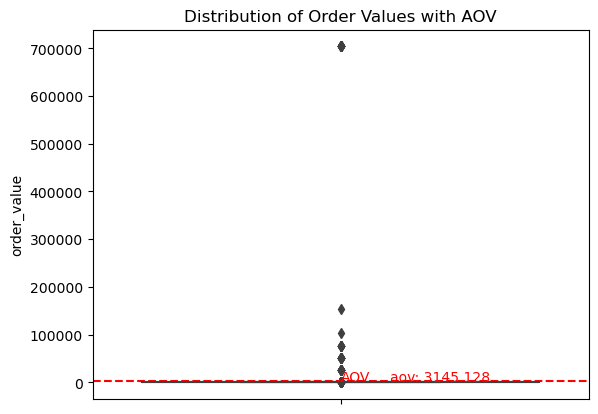

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Average Order Value (AOV)
aov = df['order_value'].sum() / df.shape[0]
print('Average Order Value:', aov)

sns.boxplot(data=df, y='order_value')
plt.axhline(y=aov, color='r', linestyle='--')
plt.text(x=0.0, y=aov, s='AOV', color='r')
plt.text(0.1, aov, f'aov: {aov}', color='r')
plt.title('Distribution of Order Values with AOV')
plt.show()

We can clearly see, that there is a big outlier in AOV, that skewes the values into the higher value

In [15]:
# Calculating median order value
median_order_value = df['order_value'].median()
print('Median Order Value:', median_order_value)

# average unit price
df['average_unit_price'] = df['order_value'] / df['total_items']
average_unit_price = df['average_unit_price'].mean()
print('Average Unit Price:', average_unit_price)

Median Order Value: 284.0
Average Unit Price: 387.7428


Those metrics should be better, because they are more robust with respect to ourliers

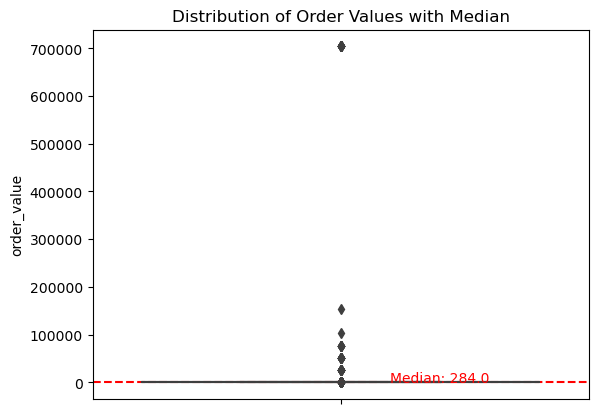

In [19]:
# Assuming 'df' is your DataFrame
sns.boxplot(data=df, y='order_value')
plt.axhline(y=median_order_value, color='r', linestyle='--')

plt.text(0.1, median_order_value, f'Median: {median_order_value}', color='r')

plt.title('Distribution of Order Values with Median')
plt.show()

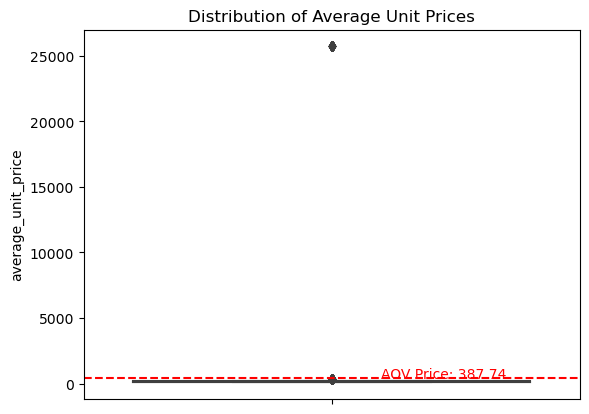

In [22]:
sns.boxplot(data=df, y='average_unit_price')
plt.axhline(y=average_unit_price, color='r', linestyle='--')

# Ensure average_unit_price_median has calculated as the median of the 'average_unit_price' column
plt.text(0.1, average_unit_price, f'AOV Price: {average_unit_price:.2f}', color='r')

plt.title('Distribution of Average Unit Prices')
plt.show()

We could also potentially remove the ourlier if we come to a conclusion, that it's not a representative data point

/tmp/ipykernel_351/4206539781.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['created_at'].dt.week


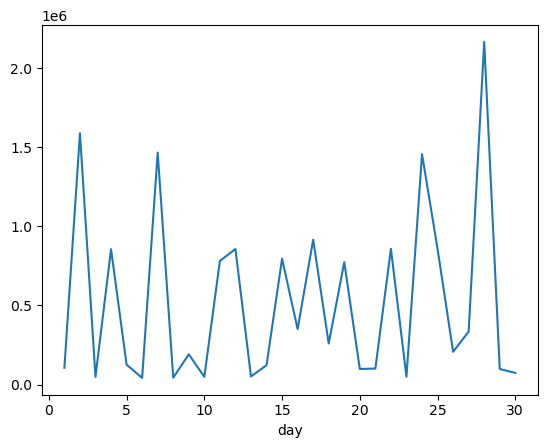

In [25]:
# Converting 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Trends in purchasing behaviour over time
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.day
df['week'] = df['created_at'].dt.week

df.groupby('day')['order_value'].sum().plot()
plt.show()